# GRADUATE ADMISSIONS PREDICTION USING THE RANDOM FOREST ALGORITHM
### What are your chances of getting into your dream graduate school?
### PREPARED BY: IMEN CHERIF

This dataset aims to predict applicants' chances of getting into graduate programs, based on: <br>
- GRE Scores ( out of 340 ). <br>
- TOEFL Scores ( out of 120 ) <br>
- University Rating ( out of 5 ) <br>
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) <br>
- Undergraduate GPA ( out of 10 ) <br>
- Research Experience ( either 0 or 1 ) <br>

Source: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions


#### 1. Data Preprocessing:

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


We can see that the different criteria the chance of admission is based on are: <br>
- The GRE Scores <br>
- The TOEFL Scores <br>
- The University Rating <br>
- The Statement of Purpose and Letter of Recommendation Strength <br>
- The Undergraduate GPA <br>
- The Research Experience <br>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


There are no missing values in the dataset. All the needed information is provided.

In [50]:
df.duplicated().sum()

0

No duplicates are present in the dataset, which means that the data was collected from 500 different students.

In [51]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The average scores of applicants in the GRE and TOEFL exams are, respectively, 316.472/340 and 107.92/120. <br>
The mean CGPA is, however, 8.57/10 which is relatively high.<br>
From the mean value of the Research feature, we can conclude that a little bit more than half the applicants have research experience (56%).

<AxesSubplot:>

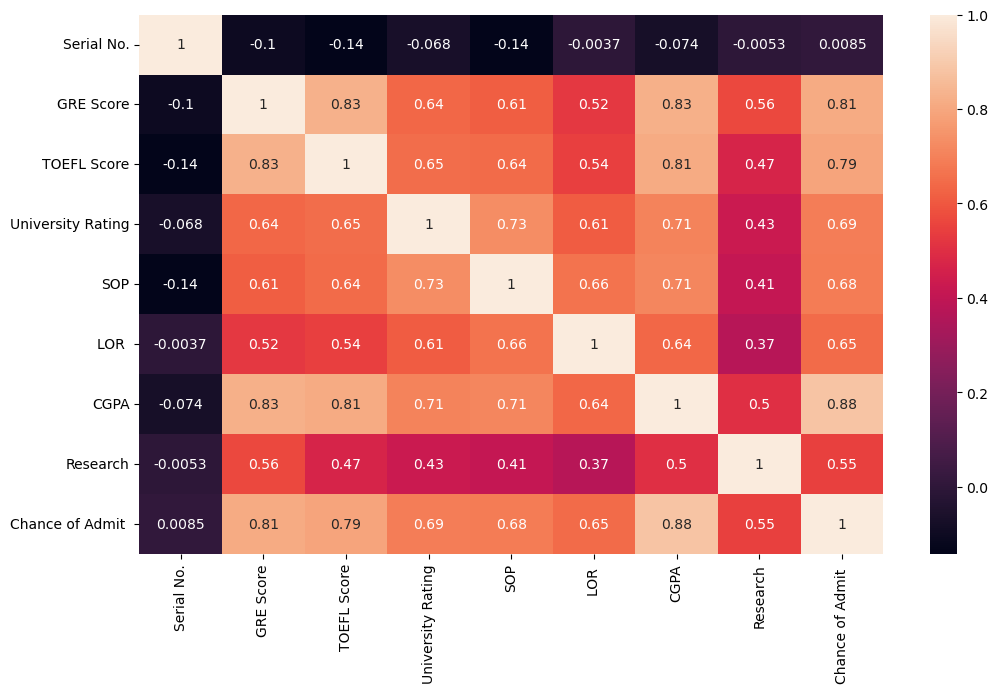

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr,annot=True)

From the heatmap, we can see that the features that are the most correlated with our target: the chance of admission are, in order: <br>
- The Cumulative GPA.
- The GRE Score.
- The TOEFL Score.
- The University Ranking.
- The Statement of Purpose Strength.
- The Letter of Motivation Strength.
- The Research Experience.

#### 2. Feature Engineering:

In [53]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
# MinMax Scaling as we know the range of each data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [57]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

When using the Random Forest Algorithm, the features' scaling is not necessary. This step was only performed for practice purposes.

#### 3. Model Implementation:

In [58]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor
random_forest = RandomForestRegressor()

# Train the random forest using the training data
random_forest.fit(X_train, y_train)


RandomForestRegressor()

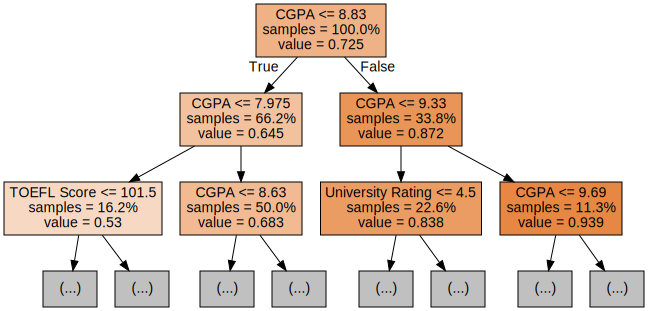

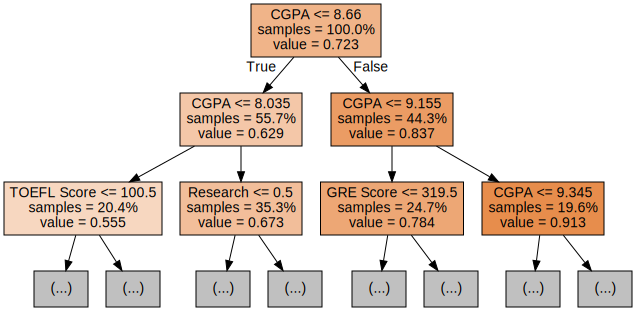

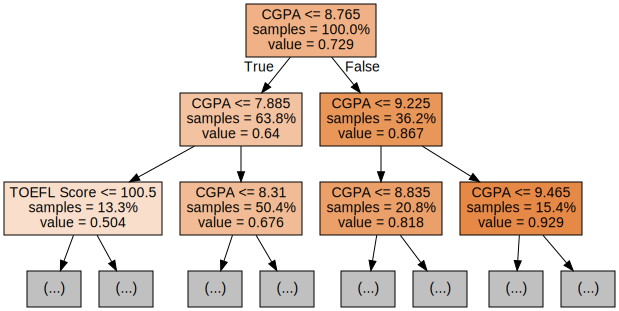

In [59]:
# Tree Visualisation Packages
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Exporting the first three decision trees from the forest
for i in range(3):
    tree = random_forest.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#### 4. Target Prediction:

In [60]:
# Predict the admission decision for the test set
y_pred = random_forest.predict(X_test)

# Evaluate the performance of the random forest
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.004333019100000005


Now, let's use GridSearchCV to find the random forest with the least mean squared error (MSE).

In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Create a Random Forest Regressor
random_forest = RandomForestRegressor()

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, cv=5)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator and its performance on the test set
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Best Estimator:', best_estimator)
print('Mean Squared Error:', mse)

Best Estimator: RandomForestRegressor(max_depth=5, min_samples_split=5)
Mean Squared Error: 0.004264172352298121


Now, let's visualize the three first trees of the random forest with the lowest mean squared error.

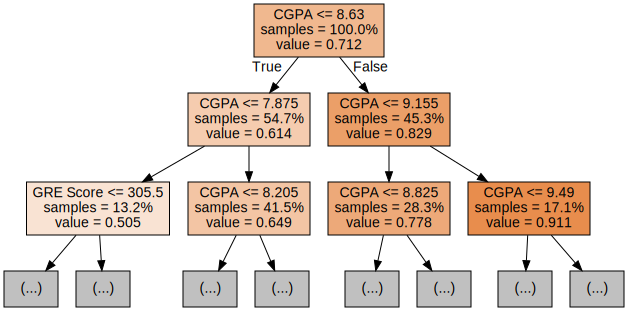

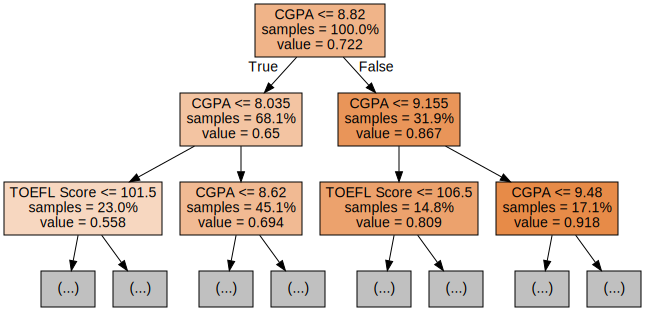

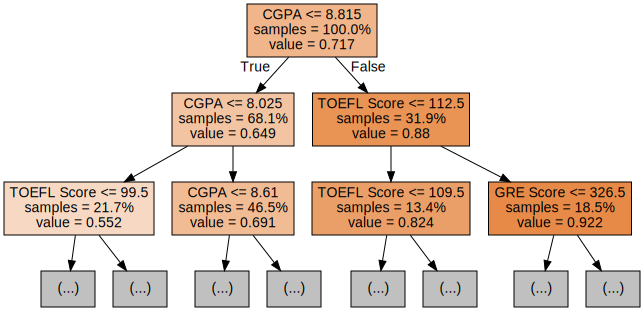

In [62]:
# Exporting the first three decision trees from the forest
for i in range(3):
    tree = best_estimator[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#### 5. Conclusion:
As we cannot make draw any conclusions from a single value of a MSE, we can compare the three trees of the two different random forests. <br>
As expected and mentioned in the beginning of this notebook, it is very likely to start the branching according to the CGPA and GRE scores, since both are highly correlated with our target: chances of admission. <br>
Therefore, applicants to graduate programs should focus during their undergraduate studies on maximizing their grade point averages and score well in the GRE test to maximize their chances of getting into good schools.